## Create classification datasets

In [1]:
import pandas as pd

In [41]:
df1 = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artwork.parquet.gzip')
df1['url'][1]

'http://wikigallery.org/wiki/painting_9698/Vincent-Van-Gogh/Starry-Night'

In [2]:
# Real paintings
df1 = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artwork.parquet.gzip')
df1.drop(columns=['name', 'url', 'artist', 'rating', 'summary', 'year', 'medium', 'location'], inplace=True)
df1['AI_generated'] = False
df1.head()

,id,image_url,AI_generated
0,0,https://kuleuven-datathon-2023.s3.eu-central-1...,False
1,1,https://kuleuven-datathon-2023.s3.eu-central-1...,False
2,2,https://kuleuven-datathon-2023.s3.eu-central-1...,False
3,3,https://kuleuven-datathon-2023.s3.eu-central-1...,False
4,4,https://kuleuven-datathon-2023.s3.eu-central-1...,False


In [20]:
# AI generated paintings
df2 = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Generated.parquet.gzip')
df2 = df2.rename(columns={'url': 'image_url'})
df2['AI_generated'] = True
df2.head()

,source_artwork,image_url,AI_generated
0,3148,https://kuleuven-datathon-2023.s3.eu-central-1...,True
1,1480,https://kuleuven-datathon-2023.s3.eu-central-1...,True
2,182,https://kuleuven-datathon-2023.s3.eu-central-1...,True
3,2493,https://kuleuven-datathon-2023.s3.eu-central-1...,True
4,2497,https://kuleuven-datathon-2023.s3.eu-central-1...,True


## Image inspection

Notes:

**Real paintings**
- different sizes
- wikipedia banner (can be on top or bottom)
- wikipedia logo (e.g., df1[40])

**AI generated**
- censorde (black) images (e.g., df2[202])

In [10]:
import io
import matplotlib.pyplot as plt
import requests
from PIL import Image

def display_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

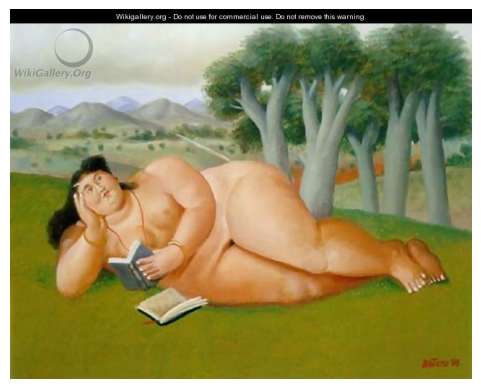

In [44]:
display_artwork(df1.image_url.values[85])

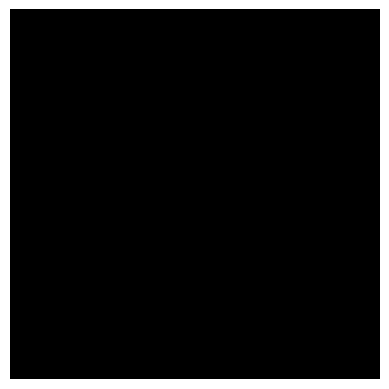

In [34]:
display_artwork(df2.image_url.values[202])

## Image preprocessing - real paintings (df1)

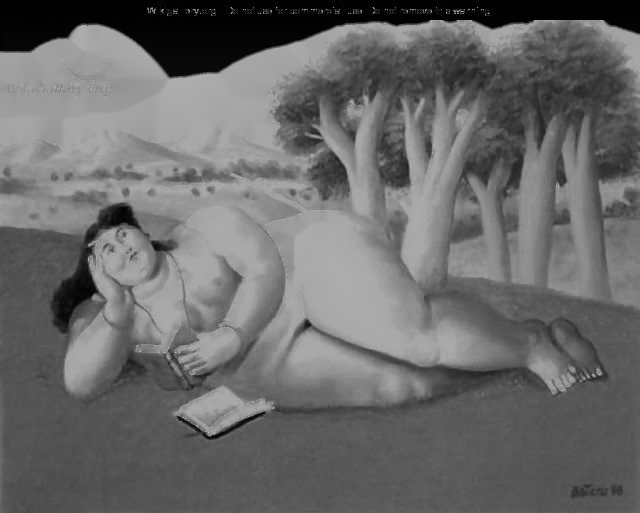

In [74]:
import cv2
url = df1.image_url.values[85]
response = requests.get(url)
image = Image.open(io.BytesIO(response.content))

image2 = np.array(image)
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
result = cv2.inpaint(gray, thresh, 3, cv2.INPAINT_TELEA)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
result_pil = Image.fromarray(result)
result_pil